In [1]:
import csv
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv') 
df_test = pd.read_csv('test.csv')

In [3]:
df_train.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
df_train['age'].describe()

count    27128.000000
mean        40.951010
std         10.608542
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [5]:
df_train['education'].describe()

count         27128
unique            4
top       secondary
freq          13882
Name: education, dtype: object

In [6]:
df_train['education'].values

array(['secondary', 'primary', 'tertiary', ..., 'primary', 'primary',
       'secondary'], dtype=object)

In [7]:
np.unique(df_train['contact'])

array(['cellular', 'telephone', 'unknown'], dtype=object)

In [8]:
np.unique(df_train['poutcome'])

array(['failure', 'other', 'success', 'unknown'], dtype=object)

In [9]:
np.unique(df_train['month'])

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [10]:
#histogram
#sns.distplot(df_train['age']);

In [11]:
df_train.head(5)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


In [12]:
#df_bank_pivot = pd.pivot_table(data=train, values='age', 
#                                  columns='id', index='y', aggfunc=np.mean)



In [13]:
#sns.heatmap(df_bank_pivot)

In [14]:
#colormap = plt.cm.RdBu
#plt.figure(figsize=(14,12))
#plt.title('Features', y=1.05, size=15)
#sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
#            square=True, cmap=colormap, linecolor='white', annot=True)

In [15]:
#train_x = df_train.drop(['y'],axis = 1)

train_y = df_train['y']

train_x = df_train

In [16]:
train_x.head(3)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1


In [17]:
#	定額預金申し込み有無（1:有り, 0:無し）
train_y.head(3)

0    1
1    1
2    1
Name: y, dtype: int64

In [18]:
full_data = [train_x]
for dataset in full_data:
    #dataset[''] = dataset[''].replace({'':0,'':1,'':2}).astype(int)
    dataset['job'] = dataset['job'].replace( {'blue-collar': 1, 'entrepreneur': 2, 'management': 3,'retired':4,'services':5,
                                             'technician':6,'admin.':7,'self-employed':8,'housemaid':9,'unemployed':10,
                                              'unknown':11,'student':12} ).astype(int)
    
    dataset['marital'] = dataset['marital'].replace({'married':0,'single':1,'divorced':2}).astype(int)
    
    dataset['education'] = dataset['education'].replace({'primary':0,'secondary':1,'tertiary':2,'unknown':3}).astype(int)
    
    dataset['default'] = dataset['default'].replace({'yes':0,'no':1}).astype(int)
    
    dataset['housing'] = dataset['housing'].replace({'yes':0,'no':1}).astype(int)
    
    dataset['loan'] = dataset['loan'].replace({'yes':0,'no':1}).astype(int)
    
    dataset['contact'] = dataset['contact'].replace({'cellular':0,'telephone':1,'unknown':2}).astype(int)

    dataset['poutcome'] = dataset['poutcome'].replace({'failure':0,'other':1,'success':2,'unknown':3}).astype(int)
    
    dataset['month'] = dataset['month'].replace( {'jan': 1, 'feb': 2, 'mar': 3,'apr':4,'may':5,
                                             'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,
                                              'nov':11,'dec':12} ).astype(int)
    

    

In [19]:
dataset.head(100)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,1,0,1,1,1756,0,1,0,3,4,939,1,-1,0,3,1
1,2,51,2,0,0,1,1443,1,1,0,18,2,172,10,-1,0,3,1
2,3,36,3,1,2,1,436,1,1,0,13,4,567,1,595,2,0,1
3,4,63,4,0,1,1,474,1,1,0,25,1,423,1,-1,0,3,1
4,5,31,3,1,2,1,354,1,1,0,30,4,502,1,9,2,2,1
5,6,29,1,1,1,1,260,0,1,2,2,6,707,14,-1,0,3,1
6,7,37,5,0,1,1,52,0,1,0,6,9,908,1,185,9,2,1
7,8,32,6,1,1,1,230,0,1,0,18,5,442,1,266,8,0,1
8,9,31,7,1,1,1,0,0,1,0,7,5,895,2,295,2,0,1
9,10,32,8,1,2,1,1815,1,1,1,10,8,235,1,102,2,0,1


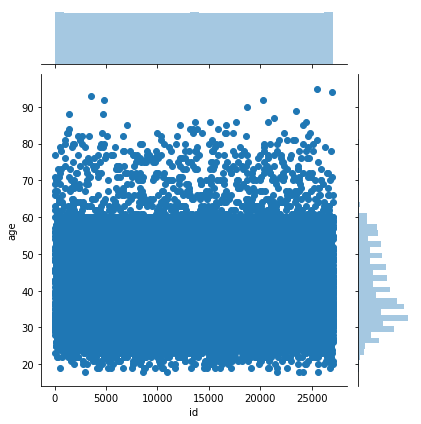

In [21]:
sns.jointplot(dataset.columns[0], dataset.columns[1], dataset)

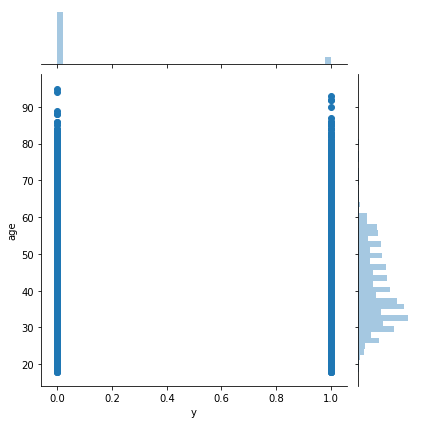

In [22]:
sns.jointplot(dataset.columns[17], dataset.columns[1], dataset)

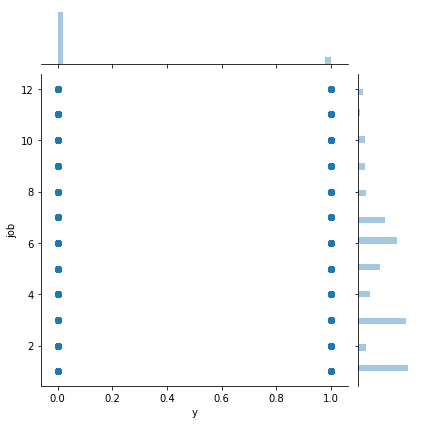

In [23]:
sns.jointplot(df_train.columns[17], df_train.columns[2], df_train)

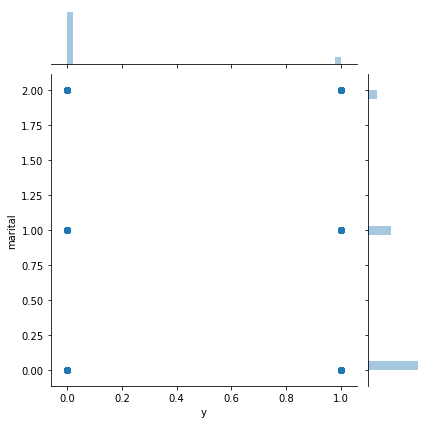

In [24]:
sns.jointplot(df_train.columns[17], df_train.columns[3], df_train)

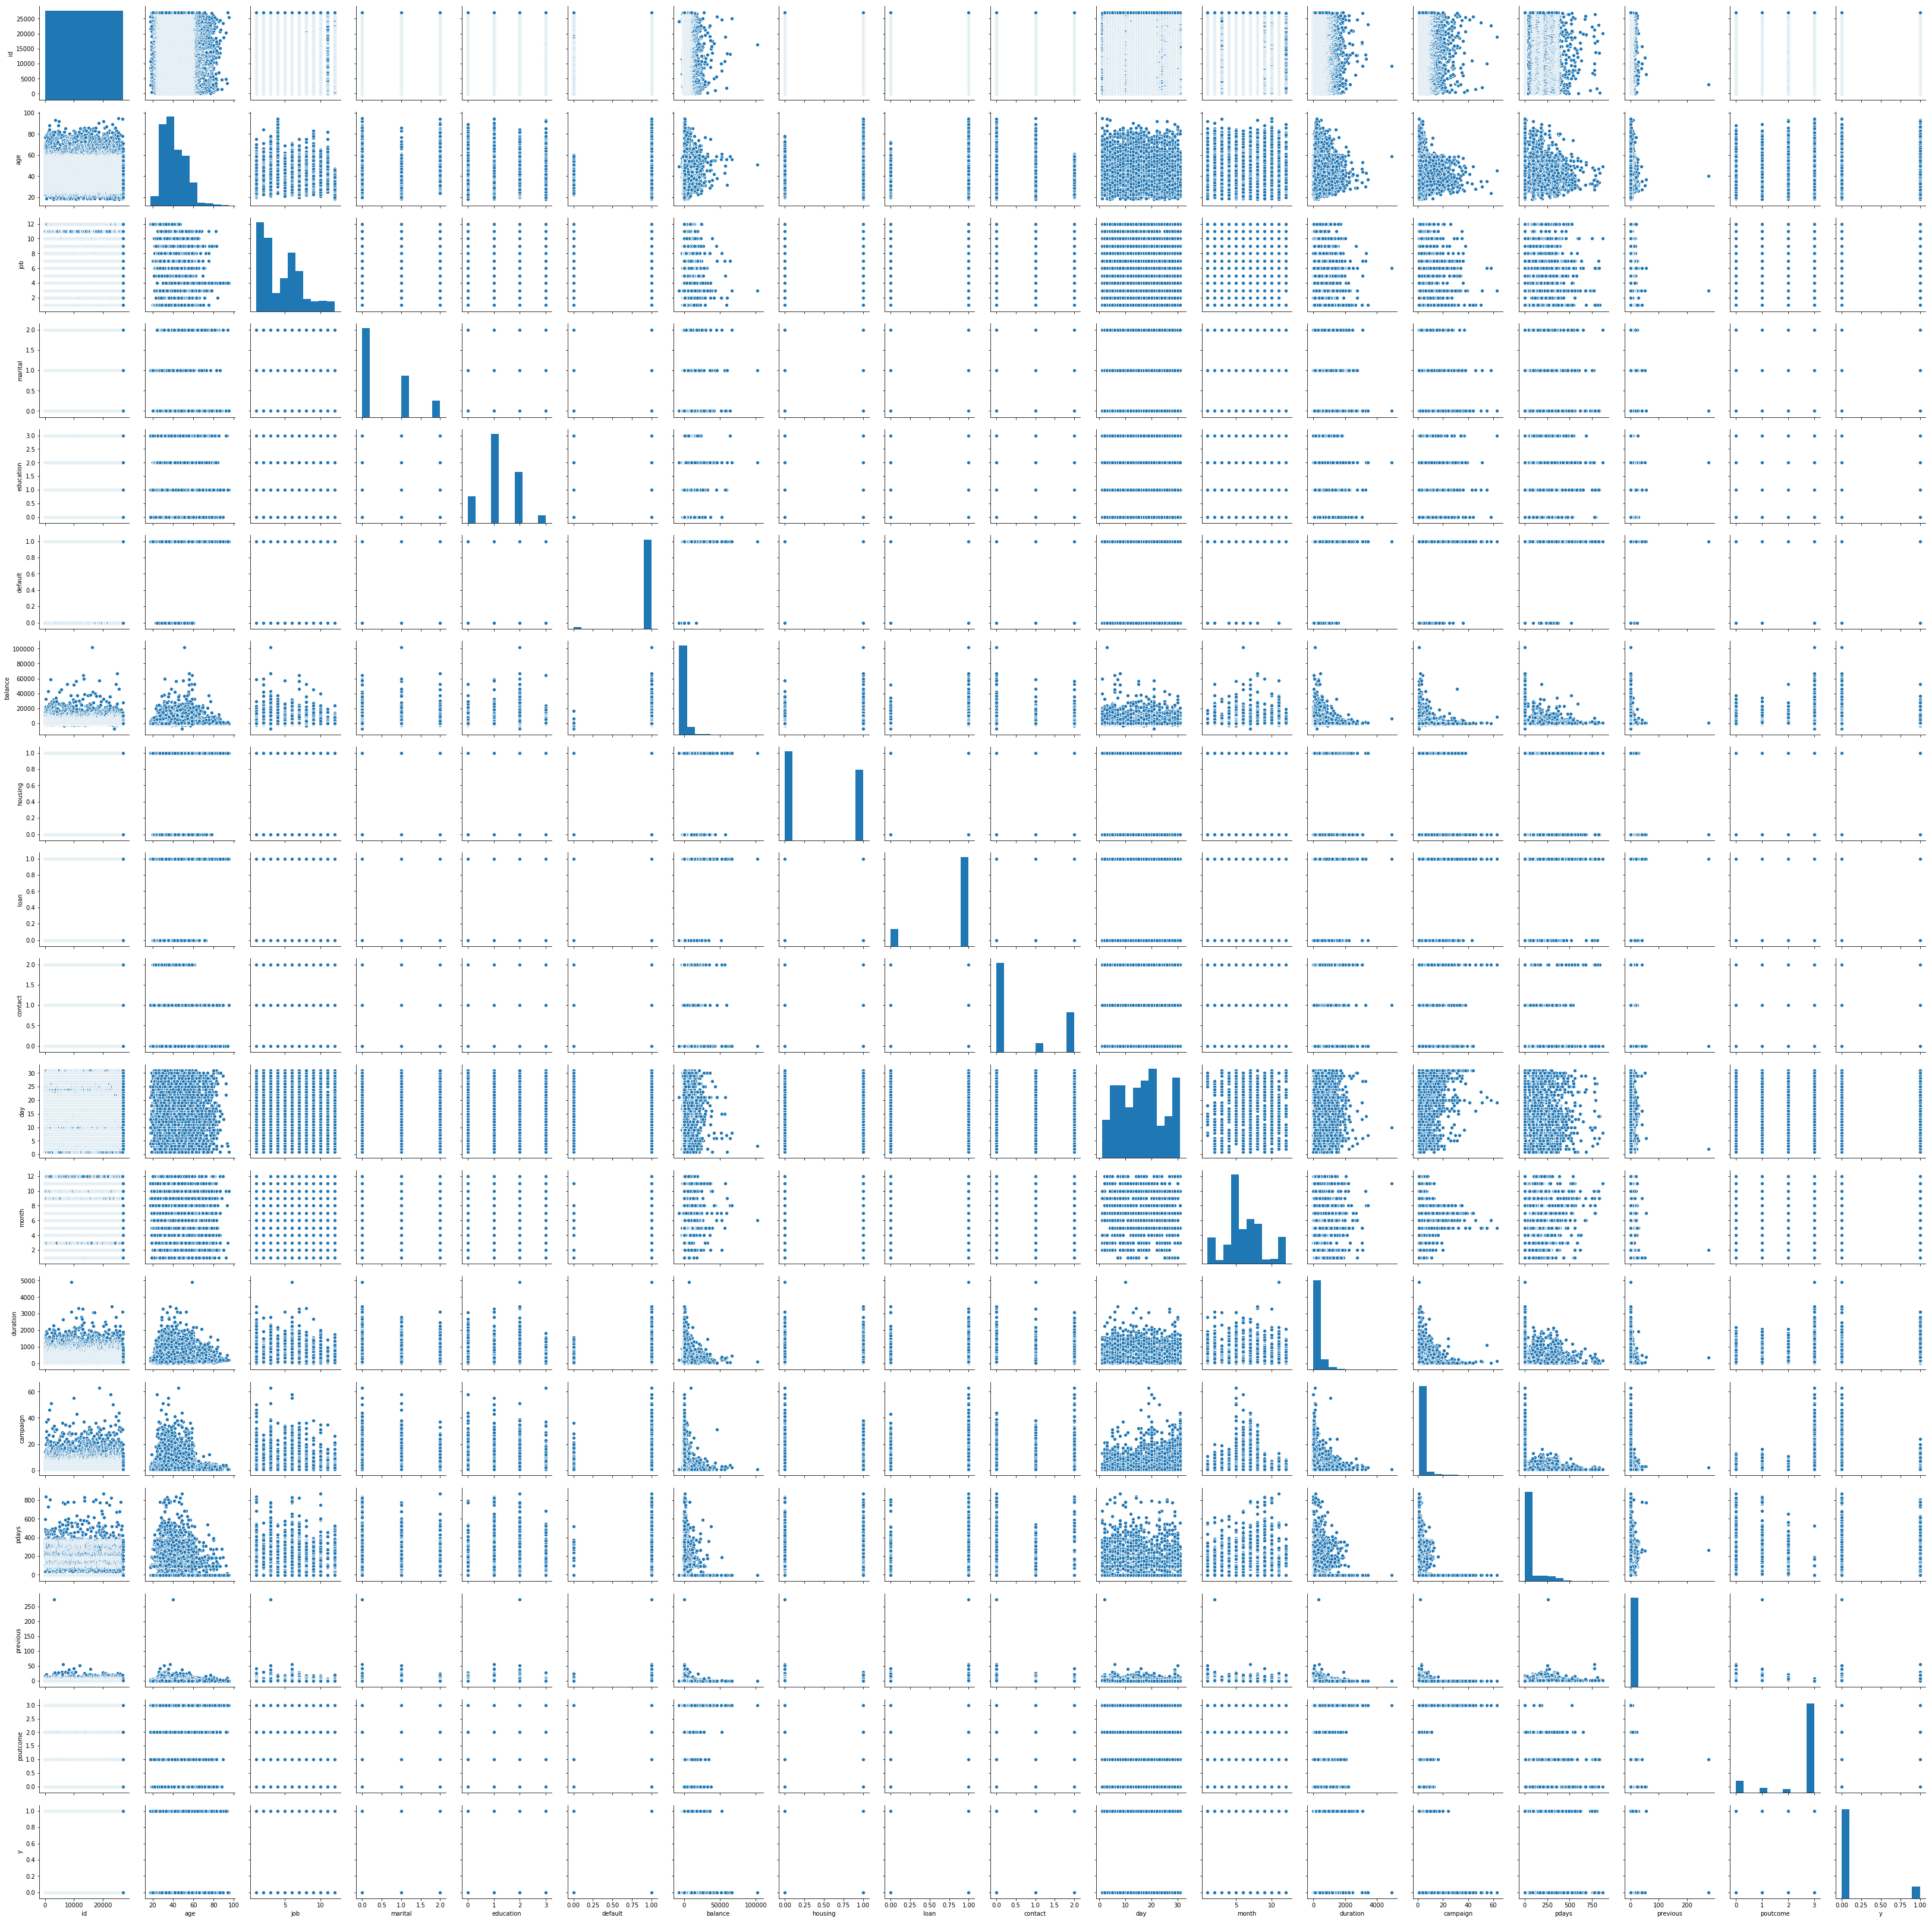

In [25]:
sns.pairplot(dataset)

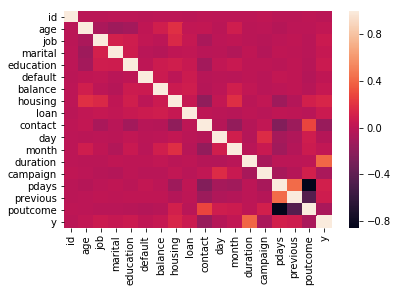

In [26]:
sns.heatmap(dataset.corr())

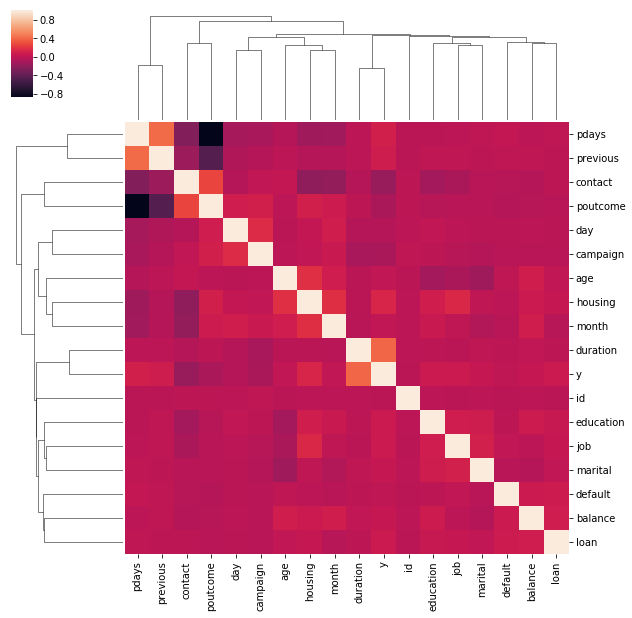

In [27]:
sns.clustermap(dataset.corr())